__________________________
#### _...Before we start..._
##### _1. Check that you have the required packages_
Please ensure you have `Python 3` and the listed items in the `requirements.txt` installed.
##### _2. Get and check your API key_
Please ensure that you have an API key from Elexon
1. Register [here](https://www.elexonportal.co.uk/registration/newuser?cachebust=3apx5qnzf9) 
> Click on `sign-in`  ->  `register`
2. Follow the instructions [here](https://www.elexon.co.uk/documents/training-guidance/bsc-guidance-notes/bmrs-api-and-data-push-user-guide-2/)
> Log-in -> Click on `my profile` -> Copy the `scripting key`
3. Paste the API Key in the `api_key.txt` file
4. Check that your API Key is saved correctly
__________________________

# `Electricity-Data-Pipeline` Examples

## 1. Import the `Electricity-Data-Pipeline` functions

In [1]:
from src.helpers.BMRS_helpers import *
from src.helpers.range_import_helpers import *
import matplotlib.pyplot as plt

Below is a list of all the `<Electricity-Data-Pipeline>` functions defined so far:

_**Table 1:** List of the quick BMRS helper functions_

`Electricity-Data-Pipeline` Quick Functions | Description | Resolution | Inputs 
------------ | ------------- | ------------ | ------------
**`demand()`** | Rolling System Demand | 5 min | demand(start_date = 'YYYY-MM-DD', end_date = 'YYYY-MM-DD', save_to_csv = False)
**`temperature()`** | Average Daily Temperature in Britain | Daily  | "
**`generation()`** | Half-hourly Generation by Fuel Type | Halfhourly (30 min) | "
**`frequency()`** | System Frequency | 15 sec | "
**`initial_demand_national()`** | Initial National Demand Out-turn | Halfhourly (30 min) | "
**`initial_demand_transmission()`** | Initial Transmission System Demand Out-turn | Halfhourly (30 min) | "
**`demand_forecast_national()`** | National Demand Forecast | Halfhourly (30 min) | "
**`demand_forecast_transmission()`** | Transmission System Demand Forecast | Halfhourly (30 min) | "
**`imbalance_volume()`** | Imbalance Volume | Halfhourly (30 min) | "
**`loss_of_load()`** | Loss of Load and De-rated Margin | Halfhourly (30 min) | "
**`imbalance_price()`** | Imbalance Price | Halfhourly (30 min) | "
**`extract_data()`** | Uses BMRS data label and tries different methods | depends on dataset of choice | extract_data(report_name = 'TEMP', start_date = 'YYYY-MM-DD', end_date = 'YYYY-MM-DD', save_to_csv = True)

_______________________________________________


_**Table 2:** List of the data extractions functions for a week or longer periods._

`Electricity-Data-Pipeline` Function for Weekly/Long-term Imports | Description | Range | Inputs 
------------ | ------------- | ------------ | ------------
**`extract_data_weekly()`** | Extracts data for a week from the start_date using the function names from the table above| Fixed - Weekly | extract_data_weekly(func_name = demand , start_date = 'YYYY-MM-DD', save_to_csv = True)
**`extract_data_range()`** | Extracts data for long timeframes | Variable  | extract_data_range(func_name = temperature, start_date = 'YYYY-MM-DD', end_date =  'YYYY-MM-DD', save_to_csv = False)
**`extract_data_range_with_BMRS_label()`** | Same as above but using BMRS report names rather than the function names from the table above | Variable | data_extract_range_with_BMRS_label(report_name = 'TEMP', start_date = 'YYYY-MM-DD', end_date =  'YYYY-MM-DD', save_to_csv = False)

## 2. Import data for a week

Here, we demonstrate the use of Table 2 functions. We chose to import data in a weekly format (i.e. Monday to Sunday) as this was our window for comparison in our [paper](https://doi.org/10.3390/en14030635).

### Default example using ```extract_data_weekly()```

In [2]:
default_week1 = extract_data_weekly() #default is demand data
default_week1

,recordType,settDate,publishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,[[[VD]]],[[[2020-03-24]]],[[[00:00:00]]],[[[25223]]],[[[Y]]]
1,[[[VD]]],[[[2020-03-24]]],[[[00:05:00]]],[[[25348]]],[[[Y]]]
2,[[[VD]]],[[[2020-03-24]]],[[[00:10:00]]],[[[25357]]],[[[Y]]]
3,[[[VD]]],[[[2020-03-24]]],[[[00:15:00]]],[[[25306]]],[[[Y]]]
4,[[[VD]]],[[[2020-03-24]]],[[[00:20:00]]],[[[25190]]],[[[Y]]]
...,...,...,...,...,...
2012,[[[VD]]],[[[2020-03-30]]],[[[23:40:00]]],[[[23950]]],[[[Y]]]
2013,[[[VD]]],[[[2020-03-30]]],[[[23:45:00]]],[[[23889]]],[[[Y]]]
2014,[[[VD]]],[[[2020-03-30]]],[[[23:50:00]]],[[[23883]]],[[[Y]]]
2015,[[[VD]]],[[[2020-03-30]]],[[[23:55:00]]],[[[24017]]],[[[Y]]]


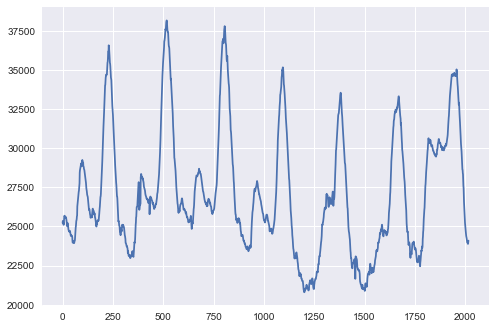

In [3]:
%matplotlib inline
plt.style.use('seaborn')
plt.plot(default_week1['fuelTypeGeneration'])

### Custom example using ```extract_data_weekly()```

In [4]:
# extract_data_weekly(func_name = function , start_date = 'YYYY-MM-DD', save_to_csv = False)
# where the 
custom_week1 = extract_data_weekly(demand, '2020-03-02', False)
custom_week1

,recordType,settDate,publishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,[[[VD]]],[[[2020-03-02]]],[[[00:00:00]]],[[[26659]]],[[[Y]]]
1,[[[VD]]],[[[2020-03-02]]],[[[00:05:00]]],[[[26755]]],[[[Y]]]
2,[[[VD]]],[[[2020-03-02]]],[[[00:10:00]]],[[[26804]]],[[[Y]]]
3,[[[VD]]],[[[2020-03-02]]],[[[00:15:00]]],[[[26781]]],[[[Y]]]
4,[[[VD]]],[[[2020-03-02]]],[[[00:20:00]]],[[[26674]]],[[[Y]]]
...,...,...,...,...,...
1991,[[[VD]]],[[[2020-03-08]]],[[[23:40:00]]],[[[24726]]],[[[Y]]]
1992,[[[VD]]],[[[2020-03-08]]],[[[23:45:00]]],[[[24662]]],[[[Y]]]
1993,[[[VD]]],[[[2020-03-08]]],[[[23:50:00]]],[[[24546]]],[[[Y]]]
1994,[[[VD]]],[[[2020-03-08]]],[[[23:55:00]]],[[[24297]]],[[[Y]]]


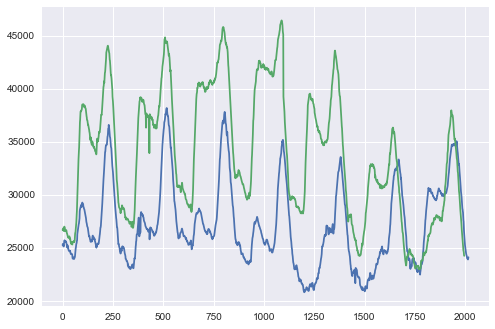

In [5]:
plt.plot(default_week1['fuelTypeGeneration'])
plt.plot(custom_week1['fuelTypeGeneration'])

## 3. Import for variable length of time

### Default example using ```extract_data_range()``` -Temperature for a month

In [6]:
default_range = extract_data_range() #Default is temperature for a month starting 24th March 2020
default_range

,recordType,publishingPeriodCommencingTime,temperature,normalReferenceTemperature,lowReferenceTemperature,highReferenceTemperature,activeFlag
0,[[[TEMP]]],[[[2020-03-24]]],[[[8.7]]],[[[9.1]]],[[[6.1]]],[[[11.3]]],[[[Y]]]
1,[[[TEMP]]],[[[2020-03-25]]],[[[9.6]]],[[[9.2]]],[[[6.2]]],[[[11.3]]],[[[Y]]]
2,[[[TEMP]]],[[[2020-03-26]]],[[[9.4]]],[[[9.2]]],[[[6.3]]],[[[11.4]]],[[[Y]]]
3,[[[TEMP]]],[[[2020-03-27]]],[[[8.6]]],[[[9.3]]],[[[6.3]]],[[[11.5]]],[[[Y]]]
4,[[[TEMP]]],[[[2020-03-28]]],[[[8.7]]],[[[9.4]]],[[[6.4]]],[[[11.6]]],[[[Y]]]
5,[[[TEMP]]],[[[2020-03-29]]],[[[6.4]]],[[[8.4]]],[[[5.7]]],[[[10.5]]],[[[Y]]]
6,[[[TEMP]]],[[[2020-03-30]]],[[[6.3]]],[[[8.5]]],[[[5.7]]],[[[10.6]]],[[[Y]]]
7,[[[TEMP]]],[[[2020-03-31]]],[[[6.6]]],[[[8.5]]],[[[5.8]]],[[[10.7]]],[[[Y]]]
8,[[[TEMP]]],[[[2020-04-01]]],[[[6.7]]],[[[8.6]]],[[[5.9]]],[[[10.8]]],[[[Y]]]
9,[[[TEMP]]],[[[2020-04-02]]],[[[8.2]]],[[[8.7]]],[[[6.0]]],[[[10.9]]],[[[Y]]]


### Custom example using ```extract_data_range()``` - loss_of_load for 2 months


```extract_data_range(func_name = temperature, start_date = '2020-03-28', end_date = '2020-03-31, save_to_csv = False)```

**Note:** the first input is the function name from Table 1 (e.g. demand, generation, etc). It is *not* in quotes but the dates are in quotes which is consistent in all functions.


In [7]:
# extract_data_range(func_name = function, start_date = '2020-03-28', end_date = '2020-03-31, save_to_csv = False)
custom_range = extract_data_range(func_name = loss_of_load, start_date = '2020-03-28', end_date = '2020-05-28', save_to_csv = True)
custom_range

,recordType,settlementDate,settlementPeriod,lolp12Forecast,drm12Forecast,lolp8HourForecast,drm8HourForecast,lolp4HourForecast,drm4HourForecast,lolp2HourForecast,drm2HourForecast,lolp1HourForecast,drm1HourForecast,activeFlag
0,[[[LOLPDRM]]],[[[2020-03-28]]],[[[1]]],[[[0.0]]],[[[21070.666]]],[[[0.0]]],[[[23099.504]]],[[[0.0]]],[[[22175.246]]],[[[0.0]]],[[[21222.95]]],[[[0.0]]],[[[21220.975]]],[[[Y]]]
1,[[[LOLPDRM]]],[[[2020-03-28]]],[[[2]]],[[[0.0]]],[[[21490.463]]],[[[0.0]]],[[[23110.518]]],[[[0.0]]],[[[21944.52]]],[[[0.0]]],[[[21360.46]]],[[[0.0]]],[[[21378.371]]],[[[Y]]]
2,[[[LOLPDRM]]],[[[2020-03-28]]],[[[3]]],[[[0.0]]],[[[22622.168]]],[[[0.0]]],[[[23546.047]]],[[[0.0]]],[[[22342.137]]],[[[0.0]]],[[[21614.16]]],[[[0.0]]],[[[21616.996]]],[[[Y]]]
3,[[[LOLPDRM]]],[[[2020-03-28]]],[[[4]]],[[[0.0]]],[[[23559.693]]],[[[0.0]]],[[[24056.416]]],[[[0.0]]],[[[23021.79]]],[[[0.0]]],[[[22305.246]]],[[[0.0]]],[[[21448.94]]],[[[Y]]]
4,[[[LOLPDRM]]],[[[2020-03-28]]],[[[5]]],[[[0.0]]],[[[23957.676]]],[[[0.0]]],[[[23755.127]]],[[[0.0]]],[[[22671.934]]],[[[0.0]]],[[[22672.795]]],[[[0.0]]],[[[21836.54]]],[[[Y]]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,[[[LOLPDRM]]],[[[2020-05-29]]],[[[44]]],[[[0.0]]],[[[12602.966]]],[[[0.0]]],[[[11865.741]]],[[[0.0]]],[[[11521.699]]],[[[0.0]]],[[[11512.066]]],[[[0.0]]],[[[11492.157]]],[[[Y]]]
3018,[[[LOLPDRM]]],[[[2020-05-29]]],[[[45]]],[[[0.0]]],[[[13589.396]]],[[[0.0]]],[[[12295.822]]],[[[0.0]]],[[[12921.775]]],[[[0.0]]],[[[12604.126]]],[[[0.0]]],[[[12574.176]]],[[[Y]]]
3019,[[[LOLPDRM]]],[[[2020-05-29]]],[[[46]]],[[[0.0]]],[[[13843.194]]],[[[0.0]]],[[[12568.973]]],[[[0.0]]],[[[13213.938]]],[[[0.0]]],[[[12812.9]]],[[[0.0]]],[[[12700.753]]],[[[Y]]]
3020,[[[LOLPDRM]]],[[[2020-05-29]]],[[[47]]],[[[0.0]]],[[[12011.821]]],[[[0.0]]],[[[13343.33]]],[[[0.0]]],[[[14162.858]]],[[[0.0]]],[[[13121.778]]],[[[0.0]]],[[[12539.959]]],[[[Y]]]


## 4. Import for data that is not in Table 1, using BMRS labels

### Custom example using `extract_data_range_with_BMRS_label()`
extract_data_range_with_BMRS_label(report_name = 'report_name', start_date = 'YYYY-MM-DD', end_date = 'YYYY-MM-DD', save_to_csv = False)

In [8]:
extract_data_range_with_BMRS_label('TEMP', '2020-11-01', '2021-02-01')

,recordType,publishingPeriodCommencingTime,temperature,normalReferenceTemperature,lowReferenceTemperature,highReferenceTemperature,activeFlag
0,[[[TEMP]]],[[[2020-11-01]]],[[[13.6]]],[[[10.6]]],[[[7.7]]],[[[12.9]]],[[[Y]]]
1,[[[TEMP]]],[[[2020-11-02]]],[[[12.8]]],[[[10.4]]],[[[7.6]]],[[[12.7]]],[[[Y]]]
2,[[[TEMP]]],[[[2020-11-03]]],[[[10.3]]],[[[10.2]]],[[[7.4]]],[[[12.6]]],[[[Y]]]
3,[[[TEMP]]],[[[2020-11-04]]],[[[8.9]]],[[[10.1]]],[[[7.3]]],[[[12.4]]],[[[Y]]]
4,[[[TEMP]]],[[[2020-11-05]]],[[[8.2]]],[[[9.9]]],[[[7.2]]],[[[12.3]]],[[[Y]]]
...,...,...,...,...,...,...,...
88,[[[TEMP]]],[[[2021-01-28]]],[[[6.8]]],[[[5.3]]],[[[1.9]]],[[[8.4]]],[[[Y]]]
89,[[[TEMP]]],[[[2021-01-29]]],[[[7.3]]],[[[5.4]]],[[[1.8]]],[[[8.4]]],[[[Y]]]
90,[[[TEMP]]],[[[2021-01-30]]],[[[5.5]]],[[[5.4]]],[[[1.8]]],[[[8.4]]],[[[Y]]]
91,[[[TEMP]]],[[[2021-01-31]]],[[[3.3]]],[[[5.4]]],[[[1.8]]],[[[8.5]]],[[[Y]]]


### Here is the rest of the functions, for you to try out:

```
demand()
temperature()
generation()
frequency()
loss_of_load()
initial_demand_national()
initial_demand_transmission()
demand_forecast_national()
demand_forecast_transmission()
imbalance_volume()
imbalance_price()


extract_data_weekly()
extract_data_range()
extract_data_range_with_BMRS_label()
```

### Use case:
To see how ```Electricity-Data-Pipeline``` was employed for assesing the impact of the March 2020 COVID-19 lockdown on the electricity system, please visit our publication below:
> Kirli, Desen; Parzen, Maximilian; Kiprakis, Aristides. 2021. "Impact of the COVID-19 Lockdown on the Electricity System of Great Britain: A Study on Energy Demand, Generation, Pricing and Grid Stability" Energies 14, no. 3: 635. [https://doi.org/10.3390/en14030635](https://doi.org/10.3390/en14030635)

All data used in this paper lives here:
> Kirli, Desen; Kiprakis, Aristides; Parzen, Max. (2021). Impact of the COVID-19 Lockdown on the Electricity System of Great Britain: A Study on Energy Demand, Generation, Pricing and Grid Stability, 2019-2020 [dataset]. University of Edinburgh. School of Engineering. Institute for Energy Systems. [https://doi.org/10.7488/ds/2979](https://doi.org/10.7488/ds/2979).